# 1.0 Introduction to Optimisation

Machine Learning has the reputation of being complex. However, underlying the so-called "complexity" are simple ideas which are enormously accessible and require elementary level mathematics to understand. When talking about learning, we assume that knowledge cannot be instantly instantiated in a computer, or a brain for that matter! Instead, it is instantiated progressively, with many errors along the way. Machine Learning is therefore an algoirthmic paradigm which iteratively instantiates knowledge via **optimisation**, which simply means  the process of *minimising the errors*.

### Required Packages

In [1]:
# REQUIRED PACAKGES
# ! pip install numpy
# ! pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap

### Data

In [2]:
# part 1
x = np.load("./data/x_range.npy")
f_x = np.load("./data/f_of_x.npy")

# part 2
x_1 = np.load("./data/x_1.npy")
x_2 = np.load("./data/x_2.npy")
classes = np.load("./data/classes.npy", allow_pickle=True)

# Colors
blue = (31/255., 119/255., 180/255.)
OWB = LinearSegmentedColormap.from_list(name="demo", colors=["orange", "white", blue])

## 1.1 Approximating Functions

Consider the following graph:

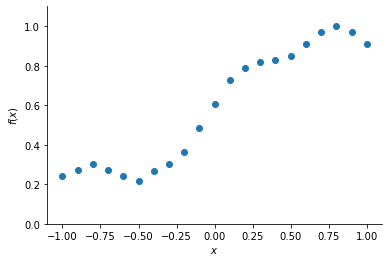

In [3]:
# Display plots in the notebook
%matplotlib inline 

plt.scatter(x, f_x)

plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.ylim(0, 1.1)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

It shows the input and output of the function $f(x)$. Of course, we don't know what that function is explicitly, but we can see that for a given input $x$, there is a corresponding output $f(x)$. Now suppose we want to model this function, how do we approach the problem?

Well, we can see that as $x$ increases, $f(x)$ tends to increase as well. Therefore, a good place to start is with a **linear model**. Let's assume that the function is linear, and so we can represent it mathematically as

$$
\hat{f}(x) = wx + b
$$

where $x$ is the input, and the **parameters** $w$ and $b$ are the weight and bias. The graph indicates that the domain of $x$ is within the range $(-1, 1)$, but the main question is, what values should $w$ and $b$ take on? In other words, what line best **approximates** the function?

Let's just set them randomly to begin with and see what happens...

In [4]:
# Initialise parameters
np.random.seed(5)
w = np.random.random()
b = np.random.random()
print(f"w={w:.3f}, b={b:.3f}")

# Make prediction
f_hat_x = w*x + b

w=0.222, b=0.871


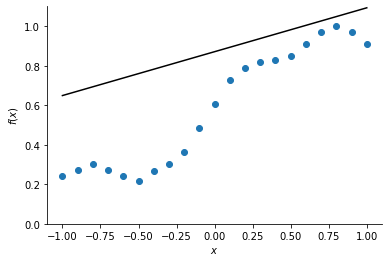

In [5]:
plt.scatter(x, f_x)
plt.plot(x, f_hat_x, color="black")

plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.ylim(0, 1.1)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

It's obvious to our eye that the line isn't a good fit. However, let's quantify how bad it is. We can measure how much **error** there is in the model's prediction compared to the known output, $f(x)$. Specifically, we will use the **mean squared error** and refer to it as the **loss**.

In [6]:
error = f_x - f_hat_x
loss = np.mean(np.square(error))
print(f"MSE: {loss:.3f}")

MSE: 0.109


Knowing that our line has this error, is there some way in which we could change $w$ or $b$ that would improve the loss, that is to say, **minimise** it? To help, we can check what effect a *small change* in each parameter has on the loss.

In [7]:
# epsilon - small change
e = 1e-10

# Make predictions with changed parameters
f_hat_x_w = (w+e)*x + b
f_hat_x_b = w*x + (b+e)

# Calculate loss
loss_w = np.mean(np.square(f_x - f_hat_x_w))
loss_b = np.mean(np.square(f_x - f_hat_x_b))

# Calculate change in loss (rate of change)
# w.r.t each parameter i.e. the partial derivative (∂)
d_w = (loss_w - loss) / e
d_b = (loss_b - loss) / e

print(f"∂ loss / ∂ w = {d_w:.3f}")
print(f"∂ loss / ∂ b = {d_b:.3f}")

∂ loss / ∂ w = -0.175
∂ loss / ∂ b = 0.566


This tells us that if we increase $w$ just slightly, the loss will *decrease*, and if we increase $b$ just slightly, the loss will *increase*. Using this information, we can update our parameters using their partial derivatives, or their **gradients**, changing them so that the loss will improve. Let's do that!

In [8]:
# Update parameters based on gradients
w -= d_w
b -= d_b
print(f"w={w:.3f}, b={b:.3f}")

w=0.397, b=0.305


We can now make a new prediction and see the result of our new line.

MSE: 0.090


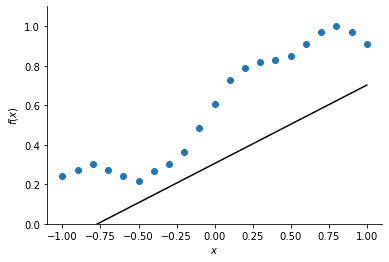

In [9]:
# Make new prediction
f_hat_x = w*x + b

# Calculate loss
error = f_x - f_hat_x
loss = np.mean(np.square(error))
print(f"MSE: {loss:.3f}")

# Show results
plt.scatter(x, f_x)
plt.plot(x, f_hat_x, color="black")

plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.ylim(0, 1.1)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

We can see that the loss has improved, but the line has jumped a long way from where it was. Instead of updating $w$ and $b$ by a large amount, we can update them using a smaller step size, refered to as $\alpha$, which is a **hyperparameter** that we can pick ourselves. Let's start again, but this time set $\alpha=0.1$, and repeat the update step $n=20$ times.

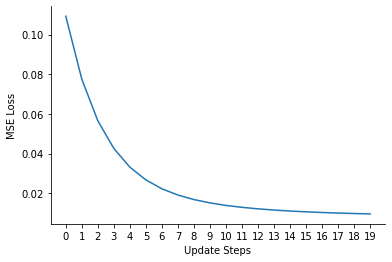

In [10]:
# Hyperparameters
α = 0.1
n = 20

# Parameters
np.random.seed(5)
w = np.random.random()
b = np.random.random()

# History
losses = []
ws = [w]
bs = [b]

# Update Loop
for step in range(n):
    
    # Make prediction
    f_hat_x = w*x + b
    
    # Calculate loss
    error = f_x - f_hat_x
    loss = np.mean(np.square(error))    
        
    # Find derivatives
    # Make predictions with changed parameters
    f_hat_x_w = (w+e)*x + b
    f_hat_x_b = w*x + (b+e)

    # Re-Calculate loss
    loss_w = np.mean(np.square(f_x - f_hat_x_w))
    loss_b = np.mean(np.square(f_x - f_hat_x_b))

    # Calculate change in loss (rate of change)
    # w.r.t each parameter i.e. the partial derivative (∂)
    d_w = (loss_w - loss) / e
    d_b = (loss_b - loss) / e
    
    # Update parameters
    w -= α*d_w
    b -= α*d_b
    
    # Add to history
    losses.append(loss)
    ws.append(w)
    bs.append(b)
    
    
#     # ---- OPTIONAL - CREATE FRAMES FOR GIF ------ #
#     # Show results
#     plt.scatter(x, f_x)
#     plt.plot(x, f_hat_x, color="black")

#     plt.ylabel("$f(x)$")
#     plt.xlabel("$x$")
#     plt.ylim(0, 1.1)

#     plt.text(-1, 1.2, f"Update Step: {step:03d}")
#     ax = plt.gca()
#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)
#     plt.savefig(f"./out/plot_{step:03d}", dpi=100)
#     plt.close()

plt.plot(range(20), losses)
plt.xlabel("Update Steps")
plt.ylabel("MSE Loss")
plt.xticks(range(20))
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

# Convert to numpy
bs = np.array(bs)
ws = np.array(ws)

We can see from the graph above that after each update step the loss decreases. Interestingly, we can see a corresponding improvement in the quality of the model in the animation below. 

![Learning Line](./assets/learning_line.gif)

The algorithm we used to update the parameters is called **gradient descent**, and it works by using the gradients to descend down the loss landscape. Within that landscape (the space of all possible values for $w$ and $b$) is hopefully a combination of the two parameters that minimises the loss to the greatest possible extent. This is called the **global optimum**. We can visualise the loss landscape by making predictions for all combinations for $w$ and $b$.

In [11]:
# Initialise landscape with zeros (empty)
landscape = np.zeros((20, 20))

MIN = float("inf")
min_w = None
min_b = None

# Loop through range of values for w
for r, w in enumerate(np.arange(0, 1, 0.05)):
    # Loop through range of values for b
    for c, b in enumerate(np.arange(0, 1, 0.05)):
        
        # Make prediction with parameters and calcuate loss
        loss = np.mean(np.square(f_x - (w*x + b)))
        
        # Update the landscape
        landscape[r, c] = loss
        
        # Track parameters with smallest loss
        if loss < MIN:
            MIN = loss
            min_w = w
            min_b = b

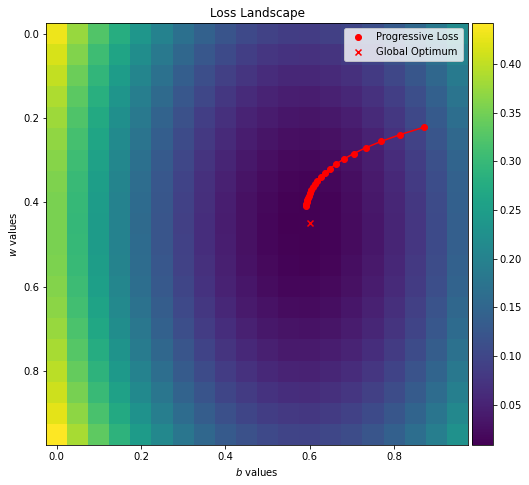

In [12]:
plt.figure(figsize=(8, 8))
plt.title("Loss Landscape")
im = plt.imshow(landscape)
plt.scatter(bs*20, ws*20, color="red", label="Progressive Loss")
plt.plot(bs*20, ws*20, color="red")
plt.scatter(min_b*20, min_w*20, color="red", marker="x", label="Global Optimum")
plt.xlabel("$b$ values")
plt.ylabel("$w$ values")
plt.xticks(ticks=range(0, 20, 4), labels=np.round(np.arange(0, 1, 0.2), 2))
plt.yticks(ticks=range(0, 20, 4), labels=np.round(np.arange(0, 1, 0.2), 2))
plt.legend()

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)



plt.show()

We can see that over the course of the optimisation process, the loss tracks towards the global optimum (but in this case doesn't quite make it!). Whether we make it or not depends a lot of factors. Some common pits falls include picking the wrong hyperparameters such as  $\alpha$, also known as the **learning rate**, or how long the algorithm is run for (the number of updates). These values needed to be *tuned* and tested empircally (via experiment!). 

For most problems in machine learning it is intractable to visualise the loss landscape and pick the global optimum. But of course, the value of gradient descent is that we don't have to. The algorithm tends to track towards the global minimum. However, sometimes, and perhaps often, the algorithm gets stuck in a **local minimum**, a place in the landscape which is the lowest in a local area. It cannot escape because the learning rate may be too small, or because the intial values doomed the algorithm from the start. In the later case, it can help by selecting new random values for the parameters and running the optimisation process again. In any case, optimization is an enormously empircal science, and despite being able to develop intution, **hyperparameter tuning** is part and parcel of the dark art of machine learning.

# 02 Non-Linear Approximation

Consider the graph below:

![Binary Classification](./assets/binary.png)

The data above indicates that a particular combination of $x_1$ and $x_2$ result in a blue class, and another combination in an orange class. 

$$
w_1x_1 + w_2x_2 + b
$$

However, as represented above, such a combination is still a linear combination. How do we get a hard limit, where a point is either in one class or the other? In essence, we want a function like:

$$
f(x_1, x_2) =
  \begin{cases}
    0 & \text{if combination of $x_1$ and $x_2$ belong to orange class} \\
    1 & \text{if combination of $x_1$ and $x_2$ belong to blue class} \\
  \end{cases}
$$


To do this we need to introduce a **non-linearity function**; a function which removes the continuity between classes. A common non-linearity function is the **sigmoid** function:

$$
\sigma(z) = \dfrac{e^z}{e^z + 1}
$$

<br>


![sigmoid function](./assets/sigmoid.png)

In [13]:
def σ(z):
    return np.exp(z) / (np.exp(z) + 1)

We can see that the range of $z$ is linear, and that values where $z < 0$ are mapped to values  $\sigma(z) \approx 0$, and values where $z > 0$ are mapped to values $\sigma(z) \approx 1$. Where  $z=0$, then $\sigma(z) = 0.5$. This tells us that we can **input a linear function to the sigmoid function** and have those values transformed into values of approximately $0$ or $1$. We can write this out as:

$$
f(x_1, x_2) = \sigma(w_1x_1 + w_2x_2 + b)
$$

We therefore want to find a linear combination of the inputs $x_1$, and $x_2$, so that when fed into the sigmoid function we can discriminate, or classify points as either orange or blue. We can use the same approach as before, except this time we have one more parameter $w_2$ to incorporate, and we assume that $f(x_1, x_2)$ (which we are approximating) outputs strictly $0$ and $1$.

In [14]:
f_x_1_2 = (classes != "orange")*1.;
f_x_1_2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

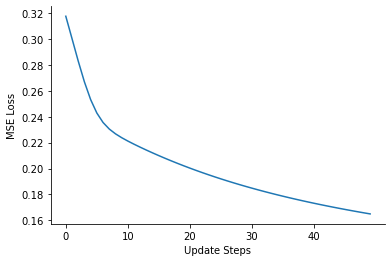

In [15]:
# Hyperparameters
α = 0.5
n = 50

# Parameters
np.random.seed(5)
w1 = np.random.random()
w2 = np.random.random()
b = np.random.random()

# History
losses = []
w1s = [w1]
w2s = [w2]
bs = [b]

# Update Loop
for step in range(n):
    
    # Make prediction
    f_hat_x_1_2 = σ(w1*x_1 + w2*x_2 + b)
    
    # Calculate loss
    error = f_x_1_2 - f_hat_x_1_2
    loss = np.mean(np.square(error))    
        
    # Find derivatives
    # Make predictions with changed parameters
    f_hat_x_1_2_w1 = σ((w1+e)*x_1 + w2*x_2 + b)
    f_hat_x_1_2_w2 = σ(w1*x_1 + (w2+e)*x_2 + b)
    f_hat_x_1_2_b  = σ(w1*x_1 + w2*x_2 + (b+e))

    # Re-Calculate loss
    loss_w1 = np.mean(np.square(f_x_1_2 - f_hat_x_1_2_w1))
    loss_w2 = np.mean(np.square(f_x_1_2 - f_hat_x_1_2_w2))
    loss_b  = np.mean(np.square(f_x_1_2 - f_hat_x_1_2_b))

    # Calculate change in loss (rate of change)
    # w.r.t each parameter i.e. the partial derivative (∂)
    d_w1 = (loss_w1 - loss) / e
    d_w2 = (loss_w2 - loss) / e
    d_b  = (loss_b - loss)  / e
    
    # Update parameters
    w1 -= α*d_w1
    w2 -= α*d_w2
    b -= α*d_b
    
    # Add to history
    losses.append(loss)
    w1s.append(w1)
    w2s.append(w2)
    bs.append(b)
    
    
#     # ---- OPTIONAL CLASSIFY ----- #
#     f_hat_x_1_2 = σ(w1*x_1 + w2*x_2 + b)
#     # Predict classes based on threshold of 0.5
#     pred = f_hat_x_1_2 > 0.5
#     pred_colors= ["orange" if y == 0 else blue for y in pred]
    
#     plt.text(0, 3.7, f"Update Step: {step:03d}")
#     plt.scatter(x_1, x_2, c=pred_colors)
#     plt.xlim(-0.25, 3.5)
#     plt.ylim(-0.5, 3.5)

#     plt.xlabel("$x_1$")
#     plt.ylabel("$x_2$")

#     ax = plt.gca()
#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)

#     plt.savefig(f"./out/plot_{step:03d}", dpi=100)
#     plt.close()

#     # ---- OPTIONAL DECISION BOUNDARIES----- #
#     decision_boundaries = np.zeros((75, 75))

#     for r, x1 in enumerate(np.arange(-0.25, 3.5, 0.05)):
#         for c, x2 in enumerate(np.arange(-0.25, 3.5, 0.05)):

#             decision_boundaries[r, c] = σ(w1*x1 + w2*x2 + b)

#     scale_factor = 3.75 / 75
#     plt.figure(figsize=(8, 8))
#     plt.text(0, 80, f"Update Step: {step:03d}")
#     plt.scatter(x_1/scale_factor, x_2/scale_factor, c=classes)
#     im = plt.imshow(decision_boundaries, vmin=0, vmax=1, cmap=grad)
#     ax = plt.gca()
#     ax.invert_yaxis()



#     plt.xticks(ticks=range(0, 75, 5), labels=np.round(np.arange(-0.25, 3.5, (3.75 / 75 * 5)), 2), rotation=90)
#     plt.yticks(ticks=range(0, 75, 5), labels=np.round(np.arange(-0.25, 3.5, (3.75 / 75 * 5)), 2))

#     plt.xlabel("$x_1$")
#     plt.ylabel("$x_2$")

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
#     plt.colorbar(im, cax=cax)

#     plt.tight_layout()
#     plt.savefig(f"./out/plot_{step:03d}", dpi=100)
#     plt.close()
    
plt.plot(range(n), losses)
plt.xlabel("Update Steps")
plt.ylabel("MSE Loss")
plt.xticks(range(0, n, 10))
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

Again, we can see the loss progressively improving, and below we can see the classification outcomes. As training continues, more and more points are being correctly classified.

![Learning Binary](./assets/binary_classification.gif)

These are on the points from the data, but there is a whole domain over which the function is defined. We can visualise the **decision boundaries**, showing us where the model discriminates between the two classes for all points (see code in main update loop).

![Deicsion Boundary](./assets/decision_boundary.gif)

The white line is the boundary when the model is 50% confident in assigning the class. Of course, there are still errors! But we have learned a model which minimises the loss and on average does a pretty good job. We can quanity that by calculating the classification accuracy.

In [16]:
y_pred = σ(w1*x_1 + w2*x_2 + b) > 0.5
y_true = f_x_1_2
# Accuracy
acc = np.sum(y_pred == y_true) / len(y_pred)
print(f"Acc: {acc*100:.2f}%")

Acc: 82.50%


# Conclusion

Here we have discovered that we can train linear and non-linear models via **gradient descent**. An obvious ineffiency is that we have to compute the loss for **every parameter** we wish to update. This is expensive for all but the most simple problems. Foretunately, instead of approximating the gradients by adding $e$, we can use the analytical method to compute them in-place, using what is called the **back-propagation algorithm**. What is better is that libraries such as `tensorflow` calculate the gradients for us automatically! We only need to think about designing the model which makes developing and testing machine learning models very easy.

Another important thing to note is that our models are made up of two simple ideas. **Linear combinations** and **Non-linear transformations**. There is no limit to the number of inputs we could have to the model. For example, 

$$
f(x) = \sigma(w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + w_6x_6 + b)
$$

Just note that for every input there must be a learnable parameter to accompany it. 

You now are familiar with the building blocks of what are called Artificial Neural Networks (ANNs), the algorithm which underpins the success of Deep Learning in recent years. ANNs will be introduced in the next notebook.